# Python Hackathon August 2024 Team 3 - Code Rangers

In [198]:
#import required libraries
#import numpy as np
#import pandas as pd



In [200]:
#file_path_Athletes="./Athletes.csv"
#file_path_Kayaking="./Kayaking.csv"
#file_path_Triathlon="./Triathlon.csv"
#file_path_Fencing="./Fencing.csv"

In [202]:
#import pandas as pd
#df_Athletes=pd.read_csv(file_path_Athletes)
#df_Kayaking=pd.read_csv(file_path_Kayaking)
#df_Triathlon=pd.read_csv(file_path_Triathlon)
#df_Fencing=pd.read_csv(file_path_Fencing)

In [104]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#ignore python warnings
warnings.filterwarnings('ignore')

In [106]:
#Read data from excel worksheets
df_Kayaking =pd.read_excel("V02Max_Combined.xlsx",sheet_name="Kayaking")
df_Athletes=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Athletes")
df_Triathlon=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Triathlon")
df_Fencing=pd.read_excel("V02Max_Combined.xlsx",sheet_name="Fencing")

1. Join all sport-related tables to produce one dataframe that has all athletes values. The final table should only have the same 5 columns: ID, time,power,RR, vo2. Write this dataframe to an excel file.

In [108]:
#concatenate all sports data to form a single dataframe
df_data = pd.concat([df_Fencing,df_Kayaking,df_Triathlon],ignore_index=True)

In [110]:
#verify data
df_data.describe()

ID         time            RR           VO2         power
count  52062.000000  52062.00000  50914.000000  52062.000000  52062.000000
mean       9.518766    547.45914    443.583808      1.539104    106.528754
std        5.043902    386.29623    212.585991      0.799706     88.603627
min        1.000000   -219.87200    252.000000      0.069354      0.000000
25%        5.000000    244.29500    352.000000      0.972290      0.000000
50%       10.000000    542.03800    412.000000      1.419143     95.000000
75%       14.000000    822.13900    484.000000      2.043474    170.000000
max       18.000000   1504.05600  30500.000000      4.576774    335.000000

In [112]:
# Export Dataframe to Excel by eliminating index
df_data.to_excel("V02Max_Sports.xlsx",sheet_name="All_Sports",index=False)

2. Divide the rows into 3 parts: Warm up, GET(graded exercise test) and cool down using the data def. Label each row accordingly

In [114]:
# cooldown = time>0 and power =0
# warmup = time<0 and power =0
# GET(graded exercise test) =time>0 and power>0

df_data["stage"] = ""
df_data.loc[df_data["power"] == 0, "stage"] = "cooldown"
df_data.loc[df_data["time"] < 0, "stage"] = "warmup"
df_data.loc[df_data["power"] > 0, "stage"] = "GET"

In [116]:
# Verify top five rows
df_data.head()

ID     time     RR       VO2  power   stage
0   1 -130.840  672.0  0.302008      0  warmup
1   1 -130.168  672.0  0.302008      0  warmup
2   1 -129.536  632.0  0.301336      0  warmup
3   1 -128.824  712.0  0.301336      0  warmup
4   1 -127.948  876.0  0.301336      0  warmup

In [118]:
#verify the count of rows for each stage
df_data["stage"].value_counts()

stage
GET         38733
cooldown     9088
warmup       4241
Name: count, dtype: int64

3. What was the average time each tested lasted excluding warm up for all athletes?

In [120]:
#get max time of individual athelete excluding warmup stage. calculate mean of max time.
avg_test_time = df_data[df_data["stage"] != "warmup"].groupby("ID")["time"].max().mean()
print("The average time each tested lasted excluding warm up for all athletes is ",avg_test_time)

The average time each tested lasted excluding warm up for all athletes is  1096.9759999999999


4. Athletes from which sport had the highest average cardiorespiratory fitness in terms of HRV?

In [123]:
df_RR = df_data.copy()
#calculated differences of RR_intervals
df_RR["HRV"]= df_RR.groupby("ID")["RR"].diff()
# Calculated HRV as standard deviation of RR_interval diffrences and updated to the athelete dataframe. 
df_Athletes = pd.merge(df_Athletes,df_RR.groupby("ID")["HRV"].std(), on="ID")

In [125]:
#calculated mean HRV value for each sport and displyed the highest average sport
high_HRV_sport=df_Athletes.groupby("sport")["HRV"].mean().sort_values(ascending=False).head(1)
print("The sport that has the highest average cardiorespiratory fitness in terms of HRV is",high_HRV_sport)

The sport that has the highest average cardiorespiratory fitness in terms of HRV is sport
kayak    170.640909
Name: HRV, dtype: float64


5. What was the average time each test lasted (including warm up) for all athletes?

In [129]:
#total test time calculated as difference between the maximum and minimum of time
total_time_taken= df_data.groupby("ID")["time"].max() - df_data.groupby("ID")["time"].min()
avg_total_time = total_time_taken.mean()
print("The average time each tested lasted including warm up for all athletes is ",avg_total_time)

The average time each tested lasted including warm up for all athletes is  1277.8059999999998


6. What was the most common  wattage (above 0) achieved by participants and for how many seconds (average time)? You may choose to show averages based on any one/all sports

In [135]:
#calculating most common wattage (above 0) interpretted as most data readings for a wattage after zero.
common_watt = st.mode(df_data[df_data["power"]!=0]["power"])
print("The most common wattage after zero for all atheletes is",common_watt)

#totaltime spent in common wattage for each participant is calculated as difference between the maximum and minimum of time spent in that wattage.
#Then calculated average time spent for all of the participants
avg_common_watt_time = (df_data[df_data["power"]==common_watt].groupby("ID").max("time")["time"]
                        -df_data[df_data["power"]==common_watt].groupby("ID").min("time")["time"]).mean()
print("The average time spent in common wattage for all atheletes is ",avg_common_watt_time)

The most common wattage after zero for all atheletes is 50
The average time spent in common wattage for all atheletes is  177.77977777777778


7. Create a correlation matrix to show the relationship between HR, BMI and sport.

In [138]:
#calculting HR as 60/(RR value/1000) added HR to data table
df_data["HR"]= 60/(df_data["RR"]/1000)

#calculating BMI as weight(kg)(height(meter))^2
df_Athletes["BMI"] = df_Athletes["Weight"]/(df_Athletes["Height"]/100)**2

#merged HR from data table and BMI and sport from atheletes table
df_corr_BMI_HR = pd.merge(df_data[["ID","HR"]],df_Athletes[["ID","sport","BMI"]],on="ID")

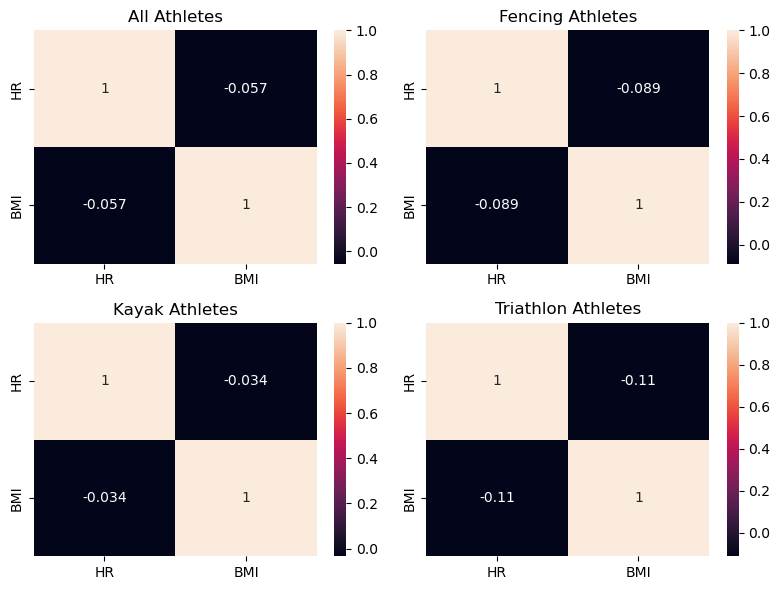

In [146]:
#correlation matrix represented as heat map for all Atheletes followed by individual sport:

plt.style.use("default")
fig, (ax1, ax2) = plt.subplots(2, 2, figsize=(8, 6))

ax1[0].set_title("All Athletes")
sns.heatmap(data=df_corr_BMI_HR[["HR","BMI"]].corr(),annot= True,ax=ax1[0])

ax1[1].set_title("Fencing Athletes")
sns.heatmap(data=df_corr_BMI_HR[df_corr_BMI_HR["sport"] == "fencing"][["HR","BMI"]].corr(),annot= True,ax=ax1[1])

ax2[0].set_title("Kayak Athletes")
sns.heatmap(data=df_corr_BMI_HR[df_corr_BMI_HR["sport"] == "kayak"][["HR","BMI"]].corr(),annot= True,ax=ax2[0])

ax2[1].set_title("Triathlon Athletes")
sns.heatmap(data=df_corr_BMI_HR[df_corr_BMI_HR["sport"] == "triathlon"][["HR","BMI"]].corr(),annot= True,ax=ax2[1])

plt.tight_layout()
plt.show()


* Significantly low correaltion observed between HR and BMI.
* No significant difference in the correlation between atheletes of different sports.

In [149]:
#dropping BMI column created
df_Athletes=df_Athletes.drop("BMI",axis=1)

8. What are the names of the kayaking athletes?

In [152]:
#filterd athelets with sport as kayak and printed their names
df_Athletes_kayak = df_Athletes[df_Athletes["sport"]=="kayak"]
print("The names of the kayaking athletes are :")
print(df_Athletes_kayak["First Name"].values + " " + df_Athletes_kayak["Last Name"].values)

The names of the kayaking athletes are :
['Isabella Griffin' 'Caleb Dixon' 'Mia Carpenter' 'Harper Mitchell'
 'Mason Wallace' 'Logan Anderson']


9. What was the average HRV of the triathletes?

In [155]:
#From HRV calcultaed from 4th question calculated the mean of triathlon athletes 
print("The average HRV of triathletes is : ",df_Athletes[df_Athletes["sport"]=="triathlon"]["HRV"].mean())

The average HRV of triathletes is :  29.293777318936115


10. How long was athlete 12 in HR Zone 5?
    **Executed the code after Q15 as zoning is done in Q15**

11. Create any 3d plot using any data. Values do not have to be from the dataset given. **Attempted after Q16 as considred BMI for the 3Dplot**

12. What were the Highest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes.

In [164]:
#Calculated sum of VO2 and added a temp column (VO2) in Athletes table
df_Athletes = pd.merge(df_Athletes,df_data.groupby("ID")["VO2"].sum(), on="ID")
#calculated VO2 max as sum of V02 by weight of Athlete
df_Athletes["VO2_max"]= df_Athletes["VO2"]/df_Athletes["Weight"]
#dropped the temp column VO2
df_Athletes=df_Athletes.drop("VO2",axis=1)

In [166]:
#Displayed the top three VO2_max Athletes
print("The highest three VO2_max are for the following athletes :")
df_Athletes.sort_values(by="VO2_max",ascending=False)[["First Name","Last Name","sport","VO2_max"]].head(3).reset_index(drop=True)

The highest three VO2_max are for the following athletes :


First Name  Last Name  sport    VO2_max
0      Caleb      Dixon  kayak  92.258212
1        Mia  Carpenter  kayak  90.758693
2   Isabella    Griffin  kayak  89.586903

13. Calculate the year of birth of each athlete and store it as a column in the tables.

In [169]:
# year of birth is year data taken(2017 ) substracted by age
df_Athletes["birth_year"]= 2017-df_Athletes["age"]
df_Athletes

ID  age  Weight  Height  P_vt1  P_vt2      sport  Gender Ethnicity  \
0    1   15    53.7     161     50    140    fencing  Female   African   
1    2   15    56.2     162     80    127    fencing    Male   African   
2    3   16    89.9     191    155    300    fencing    Male     White   
3    4   16    76.5     180    215    275    fencing    Male     White   
4    5   17    76.4     186    110    172    fencing  Female     White   
5    6   17    65.6     169    131    186    fencing  Female     White   
6    7   15    49.8     165     65    108    fencing  Female     White   
7    8   15    51.2     165     80    133    fencing  Female     White   
8    9   14    57.1     176     50    125    fencing  Female   African   
9   10   14    58.8     177    101    162    fencing  Female   African   
10  11   18    84.8     182    174    268      kayak  Female   African   
11  12   18    86.0     183    170    294      kayak    Male   African   
12  13   18    83.9     183    144    267      kayak  Female     Asian   
13  14   13    62.3     171    140    170      kayak  Female     Asian   
14  15   13    63.5     172    125    156      kayak    Male    Latino   
15  16   16    70.4     182     79    175      kayak    Male    Latino   
16  17   12    39.9     156    101    145  triathlon    Male    Latino   
17  18   12    39.7     158     65    168  triathlon    Male    Latino   

   First Name  Last Name         HRV    VO2_max  birth_year  
0      Olivia   Martinez   25.844717  42.807730        2002  
1       Ethan   Reynolds   40.725284  38.632602        2002  
2     Jackson     Harper   20.398306  69.705657        2001  
3        Liam    Sanchez   33.334630  76.989878        2001  
4         Ava   Thompson  115.319339  86.742579        2000  
5      Sophia  Rodriguez  447.371626  71.679465        2000  
6       Grace    Simmons   23.696380  38.403988        2002  
7       Aiden    Bennett  504.482368  44.822092        2002  
8       Chloe      Price   22.540326  49.697342        2003  
9        Lily     Jordan   26.865031  55.122171        2003  
10   Isabella    Griffin   13.423014  89.586903        1999  
11      Caleb      Dixon   12.283399  92.258212        1999  
12        Mia  Carpenter   12.438721  90.758693        1999  
13     Harper   Mitchell  162.070949  54.869902        2004  
14      Mason    Wallace   28.801669  66.936066        2004  
15      Logan   Anderson  794.827705  69.661622        2001  
16      Lucas     Foster   28.081705  73.789806        2005  
17       Owen      Myers   30.505849  81.208775        2005

14. What were the lowest 3 V02 Maxes recorded. Display all 3 names, sport and personal V02 Maxes. 

In [172]:
#Displayed the bottom three VO2_max Athletes
print("The lowest three VO2_max are for the following athletes :")
df_Athletes.sort_values(by="VO2_max",ascending=True)[["First Name","Last Name","sport","VO2_max"]].head(3).reset_index(drop=True)

The lowest three VO2_max are for the following athletes :


First Name Last Name    sport    VO2_max
0      Grace   Simmons  fencing  38.403988
1      Ethan  Reynolds  fencing  38.632602
2     Olivia  Martinez  fencing  42.807730

 15. Assign 1 of the following 5 heart rate zones for every record for all sports and athletes and add this as a column to every table:
* Zone 1 (recovery/easy) <100 HR max
* Zone 2 (aerobic/base) 100-120 HR max
* Zone 3 (tempo) 120-135 HR max
* Zone 4 (lactate threshold) 135-155 HR max
* Zone 5 (anaerobic) 155+ HR max and above

In [175]:
#zoning based HR using the above stated conditions:
df_data["zone"]= df_data["HR"].apply(lambda x: "Zone 1" if x <100 
                                     else "Zone 2" if x<=120 
                                     else "Zone 3" if x <= 135 
                                     else "Zone 4" if x<=155 
                                     else "Zone 5")

In [177]:
print ("Zone added to data table")
df_data.head()

Zone added to data table


ID     time     RR       VO2  power   stage         HR    zone
0   1 -130.840  672.0  0.302008      0  warmup  89.285714  Zone 1
1   1 -130.168  672.0  0.302008      0  warmup  89.285714  Zone 1
2   1 -129.536  632.0  0.301336      0  warmup  94.936709  Zone 1
3   1 -128.824  712.0  0.301336      0  warmup  84.269663  Zone 1
4   1 -127.948  876.0  0.301336      0  warmup  68.493151  Zone 1

In [179]:
#Merged zone values to all tables:
df_Fencing = df_Fencing.merge(df_data[["ID","RR","time","zone"]],on=["ID", "RR","time"])
df_Kayaking = df_Kayaking.merge(df_data[["ID","RR","time","zone"]],on=["ID", "RR","time"])
df_Triathlon=df_Triathlon.merge(df_data[["ID","RR","time","zone"]],on=["ID", "RR","time"])

In [181]:
print ("Zone added to Fencing table")
df_Fencing.head()

Zone added to Fencing table


ID     time   RR       VO2  power    zone
0   1 -130.840  672  0.302008      0  Zone 1
1   1 -130.168  672  0.302008      0  Zone 1
2   1 -129.536  632  0.301336      0  Zone 1
3   1 -128.824  712  0.301336      0  Zone 1
4   1 -127.948  876  0.301336      0  Zone 1

In [183]:
print ("Zone added to Kayaking table")
df_Kayaking.head()

Zone added to Kayaking table


ID     time     RR       VO2  power    zone
0  11 -168.600  727.0  0.287147      0  Zone 1
1  11 -167.872  728.0  0.287147      0  Zone 1
2  11 -167.148  724.0  0.287147      0  Zone 1
3  11 -166.484  664.0  0.320580      0  Zone 1
4  11 -165.836  648.0  0.320580      0  Zone 1

In [185]:
print ("Zone added to Triathlon table")
df_Triathlon.head()

Zone added to Triathlon table


ID     time     RR       VO2  power    zone
0  17 -182.408  736.0  0.363762      0  Zone 1
1  17 -181.672  736.0  0.363762      0  Zone 1
2  17 -180.968  704.0  0.363762      0  Zone 1
3  17 -180.268  700.0  0.363762      0  Zone 1
4  17 -179.616  652.0  0.363762      0  Zone 1

10. How long was athlete 12 in HR Zone 5?

In [188]:
#Total time spent by Athelete 12 in zone 5 is the difference of maximum time and minimum time.
time_z5_12 = df_data[df_data["ID"]==12][df_data["zone"]=="Zone 5"]["time"].max() - df_data[df_data["ID"]==12][df_data["zone"]=="Zone 5"]["time"].min()
print("The total time athelete 12 was in Zone 5 is ",time_z5_12//60,"minutes and ",time_z5_12%60,"seconds")

The total time athelete 12 was in Zone 5 is  8.0 minutes and  25.668000000000006 seconds


16. Calculate the BMI of every athlete and display it as a list.

In [193]:
#calculated BMI as weight(kg)(height(meter))^2
df_Athletes["BMI"] = df_Athletes["Weight"]/(df_Athletes["Height"]/100)**2
print("The list of athletes and their BMI is :")
df_Athletes.reset_index()[["First Name","Last Name","BMI"]].values.tolist()

The list of athletes and their BMI is :


[['Olivia', 'Martinez', 20.716793333590523],
 ['Ethan', 'Reynolds', 21.414418533760095],
 ['Jackson', 'Harper', 24.642964831007923],
 ['Liam', 'Sanchez', 23.61111111111111],
 ['Ava', 'Thompson', 22.083477858711987],
 ['Sophia', 'Rodriguez', 22.968383459962887],
 ['Grace', 'Simmons', 18.29201101928375],
 ['Aiden', 'Bennett', 18.80624426078972],
 ['Chloe', 'Price', 18.433626033057852],
 ['Lily', 'Jordan', 18.768553097768837],
 ['Isabella', 'Griffin', 25.600772853520105],
 ['Caleb', 'Dixon', 25.680074054167036],
 ['Mia', 'Carpenter', 25.05300247842575],
 ['Harper', 'Mitchell', 21.305700899422046],
 ['Mason', 'Wallace', 21.464305029745812],
 ['Logan', 'Anderson', 21.253471802922352],
 ['Lucas', 'Foster', 16.395463510848124],
 ['Owen', 'Myers', 15.902900176253803]]

11. Create any 3d plot using any data. Values do not have to be from the dataset given. 

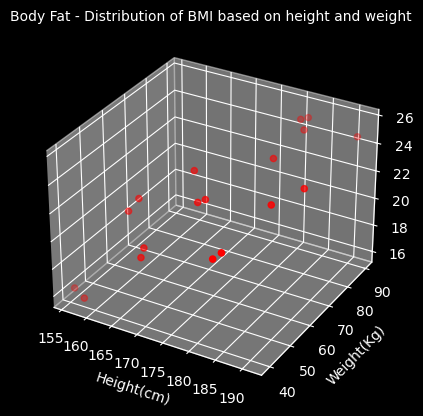

In [204]:
#created 3D plot using BMI,Height and weight from Athletes table:
plt.style.use("dark_background")
ax = plt.axes(projection = "3d")

ax.set_title("Body Fat - Distribution of BMI based on height and weight", fontsize=10)
ax.set_xlabel("Height(cm)")
ax.set_ylabel("Weight(Kg)")
ax.set_zlabel("BMI(Kg/m^2)")

ax.scatter(df_Athletes["Height"],df_Athletes["Weight"],df_Athletes["BMI"],color= 'r')
plt.show()
plt.style.use("default")

Q65.[ 1,  2,  3,  4,  5],
    [ 6,  7,  8,  9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25],
    [26, 27, 28, 29, 30]  Use array slicing to display elements 4,7,10,17."

In [19]:
import numpy as np
#Array
array = np.array([[ 1,  2,  3,  4,  5],
                  [ 6,  7,  8,  9, 10],
                  [11, 12, 13, 14, 15],
                  [16, 17, 18, 19, 20],
                  [21, 22, 23, 24, 25],
                  [26, 27, 28, 29, 30]])

print(array[0,3],",",array[1,1],",",array[1,4],",",array[3,1])


4 , 7 , 10 , 17


Q66.On average, how long did each participant spend at 200 watts?

In [23]:
#Filtering power==200
df_power_200 = df_data[df_data['power'] == 200 ]
df_power_avg = df_power_200.groupby('ID')['time'].mean()

df_Athletes['Name']=df_Athletes['First Name']+ ' '+df_Athletes['Last Name']
df_merged = pd.merge(df_power_avg, df_Athletes[['ID', 'Name']], on='ID')



df_merged = df_merged[['ID','Name', 'time']]
df_merged.rename(columns={'ID':'ID','Name': 'name', 'time': 'avg time',}, inplace=True)

print(df_merged.to_string(index=False))

 ID             name   avg time
  3   Jackson Harper 750.426811
  4     Liam Sanchez 747.390507
  5     Ava Thompson 752.161512
  6 Sophia Rodriguez 747.582241
  9      Chloe Price 689.205778
 10      Lily Jordan 736.167525
 11 Isabella Griffin 755.487523
 12      Caleb Dixon 748.662993
 13    Mia Carpenter 747.937121
 14  Harper Mitchell 760.236267
 15    Mason Wallace 749.079365
 16   Logan Anderson 758.173876
 18       Owen Myers 734.506952


Q67.Athletes from which sport had the highest average cardiorespiratory fitness in terms of v02 max?


In [21]:
df_Sum_VO2=df_data.groupby('ID')['VO2'].sum().reset_index()

df_merge_VO2=pd.merge(df_Athletes, df_Sum_VO2[['ID', 'VO2']], on='ID')
df_merge_VO2['VO2max']=df_merge_VO2['VO2']/df_merge_VO2['Weight']
df_merge_VO2_Sport=df_merge_VO2.groupby('sport').VO2max.mean().reset_index()
highest_VO2max_sport = df_merge_VO2_Sport.loc[df_merge_VO2_Sport['VO2max'].idxmax()]

In [55]:
highest_VO2max_sport

sport     triathlon
VO2max    77.499291
Name: 2, dtype: object

In [27]:
df_data

ID     time     RR       VO2  power     stage
0      11 -168.600  727.0  0.287147      0    warmup
1      11 -167.872  728.0  0.287147      0    warmup
2      11 -167.148  724.0  0.287147      0    warmup
3      11 -166.484  664.0  0.320580      0    warmup
4      11 -165.836  648.0  0.320580      0    warmup
...    ..      ...    ...       ...    ...       ...
52057  10  942.700  428.0  0.786363      0  cooldown
52058  10  943.124  424.0  0.786363      0  cooldown
52059  10  943.552  428.0  0.786363      0  cooldown
52060  10  943.976  424.0  0.786363      0  cooldown
52061  10  944.404  428.0  0.786363      0  cooldown

[52062 rows x 6 columns]

#Q68 What % of athletes exceeded 90% of max HR? (Max HR is calculated as 220-Age)

In [64]:

df_data_copy=df_data.copy()
df_data_copy=pd.merge(df_data_copy,df_Athletes[['ID','age']],on='ID')
df_data_copy['HeartRate_bpm']=60/(df_data_copy['RR']/1000) 
# Calculate maxHR as 220 - age
df_data_copy['maxHR'] = 220 - df_data_copy['age']

# Calculate 90% of maxHR
df_data_copy['HR_90'] = df_data_copy['maxHR']*0.90

# Filter rows where HeartRate_bpm is greater than or equal to 90% of maxHR
filtered_result = df_data_copy[df_data_copy['HeartRate_bpm'] > df_data_copy['HR_90']]
percentage = (len(filtered_result) / len(df_data_copy)) * 100

print(f"Percentage of athletes with Heart Rate > 90% of maxHR: {percentage:.2f}%")


Percentage of athletes with Heart Rate > 90% of maxHR: 6.91%


#Q69.What was the lowest heart rate recorded at a power wattage of 200

In [65]:
# Filter the rows where power is equal to 200
filtered_df = df_data_copy[df_data_copy['power'] == 200]

# Group the filtered DataFrame by 'ID' and calculate the minimum HeartRate_bpm for each group
grouped_df = filtered_df.groupby('ID')['HeartRate_bpm'].min()

# Display the result
rounded_df=grouped_df.round(2)
print("The Lowest HeartRate recorded ata power Wattage of 200 is : ",rounded_df.min())

The Lowest HeartRate recorded ata power Wattage of 200 is :  71.77


Q70.On Average how long did most athletes spend at 75% of MaxHR (Max HR is calculated as 220-Age)

In [67]:
# Merge the dataframes on the 'ID' column

#df_data_heartRate = pd.merge(result, df_data[['ID', 'time', 'power','stage']], on='ID')
# Calculate 75% of maxHR
df_data_copy['HR_75%'] = df_data_copy['maxHR'] * 0.75

# Filter the DataFrame to include only rows where HeartRate_bpm is between 70% and 90% of maxHR
#df_filtered = df_data_copy[(df_data_copy['HeartRate_bpm'] >= df_data_copy['HR_75%'])]
df_filtered = df_data_copy[(df_data_copy['HeartRate_bpm'] >= df_data_copy['HR_75%']) & 
                       (df_data_copy['HeartRate_bpm'] < df_data_copy['HR_90'])]

average_time_per_athlete = df_filtered.groupby('ID')['time'].mean().reset_index()
average_time_per_athlete




ID         time
0    1   463.144826
1    2   400.432221
2    3   998.309129
3    4   995.972448
4    5   818.720498
5    6   770.485261
6    7   482.628666
7    8   540.128857
8    9   487.720808
9   10   615.379955
10  11  1052.122841
11  12   961.323095
12  13   958.407877
13  14   727.665182
14  15   640.377848
15  16   720.307425
16  17   456.179177
17  18   591.699172

#Q71.Create a crosstab to show each sport as a column and each heart rate zone as rows with counts of rows that satisfy each condition as values

In [68]:
df_data_zoning=df_data.copy()
df_data_zoning=pd.merge(df_data,df_Athletes[['ID','age','sport']],on ='ID')
df_data_zoning['HRMax']=220-df_data_zoning['age']
df_data_zoning['HeartRateBPM'] = 60 / (df_data_zoning['RR'] / 1000)
df_data_zoning['Heart_Rate_Percentage']=(df_data_zoning['HeartRateBPM']/df_data_zoning['HRMax'])*100
#Zoning Code using pd.cut()

df_data_zoning['zone'] = pd.cut(df_data_zoning['HeartRateBPM'], 
                          bins=[0, 100, 120, 135, 155, float('inf')], 
                          labels=['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4', 'Zone 5'], 
                          right=False)

ct = pd.crosstab(df_data_zoning['sport'], df_data_zoning['zone'])
ct

zone       Zone 1  Zone 2  Zone 3  Zone 4  Zone 5
sport                                            
fencing      2258    3433    4269    6322   11321
kayak        1456    2621    3434    4464    6791
triathlon     464     318    1089     893    1781

#Q72.Provide an example of a lambda function that multiplies any 2 input values.

In [69]:
def myfunc(n,y):
  return lambda : n * y

multiplier = myfunc(2,3)

print(multiplier())

6


#Q73. How long was athlete 17s warm up

In [70]:
filtered_df = df_data_copy[(df_data_copy['stage'] == 'warmup') & (df_data_copy['ID'] == 17)]

# Group by 'ID' and sum the 'time' column
grouped_sum = ((filtered_df.groupby('ID')['time'].sum())/6000).abs().round(2).reset_index()
print(grouped_sum)

   ID  time
0  17  3.66


#Q74 Take a students full name and reverse it using a for loop

In [71]:
def reverse(fullname):
    reversed_name = ""
    for i in range(len(fullname)):
       reversed_name += fullname[(len(fullname)-1)-i]
    return reversed_name

print(reverse("Anuvarsha Susendra"))

ardnesuS ahsravunA


Q75.What was the maximum heart rate recorded during the test. Which athlete did it belong to? Display name, sport and HR

In [72]:
#df_data_copy['HeartRate_bpm']=60/(df_data['RR']/1000) 



df_merged = pd.merge(df_Athletes, df_data_copy[['ID', 'HeartRate_bpm']], on='ID')

# Calculate the mean Heart Rate for each athlete
mean_heart_rate = df_merged.groupby('ID')['HeartRate_bpm'].mean().reset_index()

# Merge mean heart rate with athlete details
result = pd.merge(mean_heart_rate, df_Athletes, on='ID')

max_heart_rate_row = result[result['HeartRate_bpm'] == result['HeartRate_bpm'].max()]

print(max_heart_rate_row[['ID','Name','sport','HeartRate_bpm']])

   ID             Name    sport  HeartRate_bpm
0   1  Olivia Martinez  fencing     155.069723


Q76.np.arange(1,31).reshape(6,5),find array slicing to get the elements 2,5,13,25,30. #np.lib.stride_tricks.as_strided

In [73]:
import numpy as np


np.arange(1,31).reshape(6,5)

print(array[0,1],",",array[0,4],",",array[2,2],",",array[4,4],",",array[5,4])

2 , 5 , 13 , 25 , 30


Q77.Display a violin chart to show distribution of VO2Max against age.


<Axes: xlabel='age', ylabel='VO2max'>

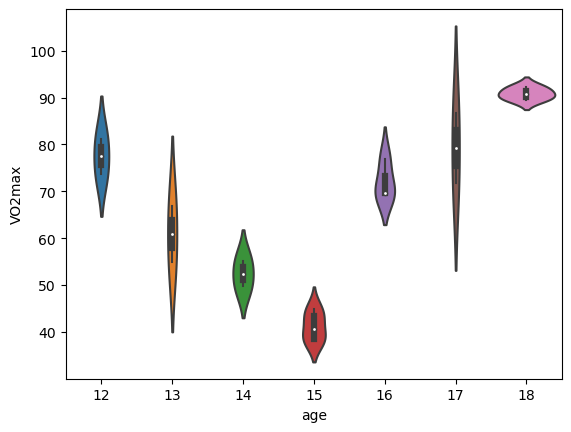

In [75]:
import seaborn as sns

# plot
sns.violinplot(x=df_merge_VO2['age'], y=df_merge_VO2['VO2max'])


Q78.Create a heatmap that show heart rate zones by minutes and the number of athletes in each HR and each minute.

zone      Zone 1  Zone 2  Zone 3  Zone 4  Zone 5
time_min                                        
0             18      18      18      18      18


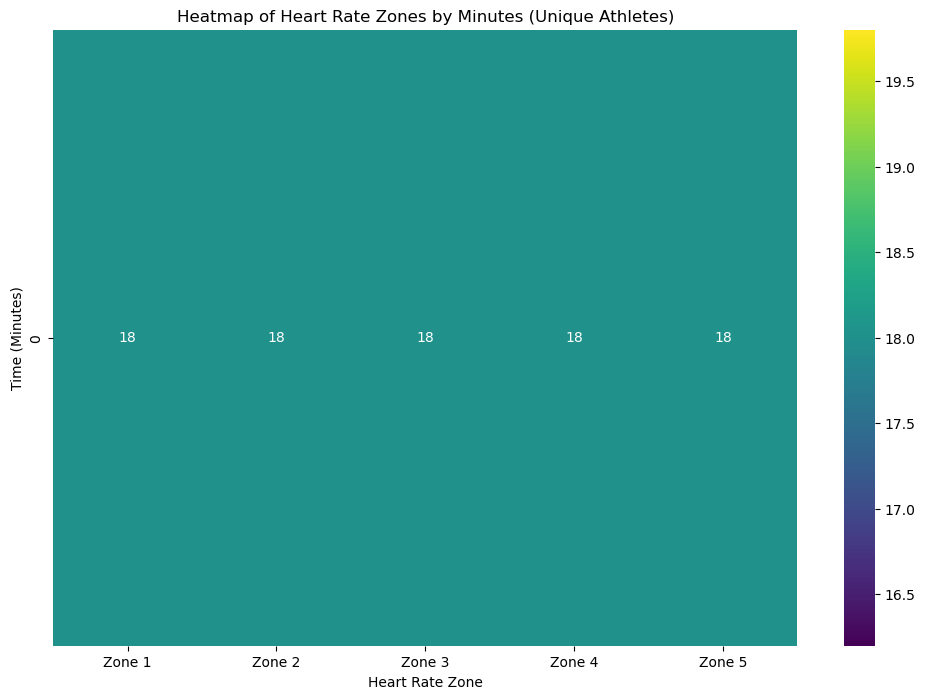

In [76]:
df_data_zoning['time_min'] = (df_data_zoning['time'] / 60000).astype(int)

# Grouping to count unique athletes in each zone per minute
grouped_df = df_data_zoning.groupby(['time_min', 'zone', 'ID']).size().reset_index(name='count')
grouped_df = grouped_df.groupby(['time_min', 'zone'])['ID'].nunique().unstack(fill_value=0)

# Check the grouped dataframe to ensure data is aggregated correctly
print(grouped_df.head())

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_df, cmap="viridis", annot=True, fmt="d")
plt.title('Heatmap of Heart Rate Zones by Minutes (Unique Athletes)')
plt.xlabel('Heart Rate Zone')
plt.ylabel('Time (Minutes)')
plt.show()

#Q79.Plot the Donut chart athlete distrubution by Gender

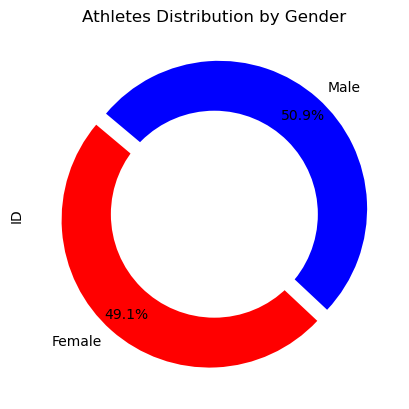

In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
grouped_df = df_Athletes.groupby('Gender')['ID'].sum()
  

colors = ['#FF0000', '#0000FF']  
explode = (0.05, 0.05)  
grouped_df.plot.pie(
    colors=colors,
    labels=grouped_df.index, 
    autopct='%1.1f%%',
    pctdistance=0.85,
    explode=explode,
    
    startangle=140
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()  # Get current figure
fig.gca().add_artist(centre_circle)


plt.title('Athletes Distribution by Gender')

plt.show()



#Q80 find the size of a Tuple for any given input 

In [52]:
# Prompt the user to enter a list of tuples 
user_input = input("Enter a list of tuples : ") 
 
# Convert the user input string to a list of tuples using eval() 
tuple_list = eval(user_input) 
print(type(tuple_list))
print(len(tuple_list))

Enter a list of tuples : "ANu","Varsha"
<class 'tuple'>
2
